In [57]:
from regions import Regions
from regions.core import PixCoord
from regions.shapes import RectangleSkyRegion, RectanglePixelRegion

import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import Angle, SkyCoord
from astropy.utils.data import get_pkg_data_filename
from astropy import units as u
import numpy as np

import pyregion

print(Regions.get_formats())

Format Parse Serialize Read Write Auto-identify
------ ----- --------- ---- ----- -------------
  crtf   Yes       Yes  Yes   Yes           Yes
   ds9   Yes       Yes  Yes   Yes           Yes
  fits   Yes       Yes  Yes   Yes           Yes


[<RectanglePixelRegion(center=PixCoord(x=1010.5698248354418, y=838.2382734286002), width=319.66890215485455, height=542.8339242684796, angle=-0.007174681159909824 deg)>,
 <RectanglePixelRegion(center=PixCoord(x=1427.7204223770655, y=621.3802461902694), width=448.5496436083607, height=559.9344289178008, angle=-0.17621411510638296 deg)>,
 <RectanglePixelRegion(center=PixCoord(x=1909.6272166705771, y=646.9815279201089), width=472.4071241135345, height=616.8373731064346, angle=-0.2614878945646808 deg)>,
 <RectanglePixelRegion(center=PixCoord(x=2341.8372222363114, y=588.2491739362215), width=313.39384665007464, height=343.5278228532031, angle=-0.3696578216969897 deg)>,
 <RectanglePixelRegion(center=PixCoord(x=925.3737112416566, y=320.52768527988945), width=395.91714452533154, height=377.7835210490644, angle=-0.19563169151224002 deg)>,
 <RectanglePixelRegion(center=PixCoord(x=639.2416164254894, y=754.2437036625479), width=341.9168501028949, height=444.7944899772361, angle=0.03400505349004845

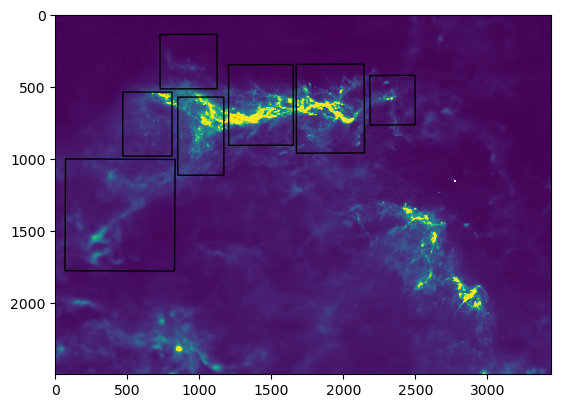

In [58]:
#file/names
orionA_file = '/Users/alisonandrade/Documents/alison_17/590thesis/orion/OrionMaps/Orion_ja_columndensity1.fits'
regions_file = '/Users/alisonandrade/Documents/alison_17/590thesis/orion/OrionMaps/regions2.reg'

#opening/reading files
orionA_data = get_pkg_data_filename(orionA_file)
orion_A = fits.open(orionA_data)

with fits.open(orionA_file) as orion_A:
    orionA = orion_A[0].data
    
regions = Regions.read(regions_file, format = 'ds9') ##same as parsing?
regions_str = regions.serialize(format = 'ds9')
#regions = Regions.parse(regions_str, format = 'ds9')

wcs = WCS(orion_A[0].header)
#pix_region = w.world_to_pixel(regions[0].center) ##convert center of rectangle to pixel 
#print (pix_region, '\n\n', regions[0].center)
plt.imshow(orionA, vmin = 0.00000533 , vmax = 0.0005)


regions_pix = []
for x in range(len(regions)):
    region0 = (RectangleSkyRegion(regions[x].center, regions[x].width, regions[x].height, regions[x].angle))
    regions_pix.append(region0.to_pixel(wcs))
    regions_pix[x].plot()
regions_pix
#artist = region0.as_artist
#pix_region.plot()

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

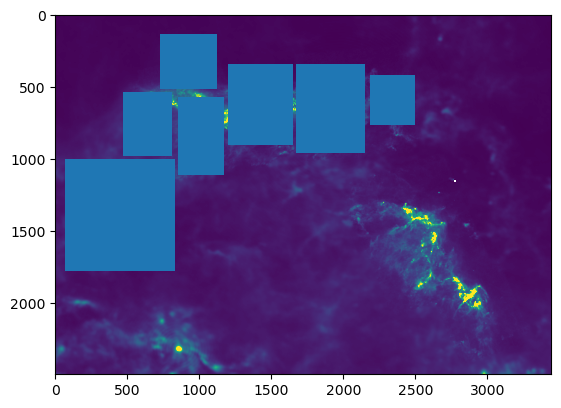

In [52]:
ax = plt.subplot(1, 1, 1)
#ax.add_artist(mask0.bbox.as_artist(facecolor = 'none', edgecolor = 'white', fill = True))
#ax.add_artist(regions_pix[0].as_artist(facecolor = 'none', edgecolor = 'orange', fill = True))
#ax.add_artist(mask0.bbox.as_artist())

for x in range(len(regions_pix)):
    mask = regions_pix[x].to_mask()
    ax.add_artist(mask.bbox.as_artist())
ax.imshow(orionA, vmin = 0.00000533 , vmax = 0.0005)

mask0.data #data of mask **ARRAY OF 1s
#help(regions_pix[0].to_mask().bbox.as_artist())
#regions_pix[0].to_mask().bbox.as_artist().properties()

In [21]:
mask = np.logical_and(orionA, regions_pix[0])
mask
orionA

array([[1.08645627e-05, 1.08216263e-05, 1.07870446e-05, ...,
        9.71163536e-06, 9.71417649e-06, 9.71534155e-06],
       [1.09026560e-05, 1.08579934e-05, 1.08082968e-05, ...,
        9.79072047e-06, 9.78936805e-06, 9.78736716e-06],
       [1.09457851e-05, 1.08900595e-05, 1.08318764e-05, ...,
        9.86259693e-06, 9.86448958e-06, 9.86412215e-06],
       ...,
       [9.07444482e-05, 8.98900107e-05, 8.90570882e-05, ...,
        4.32548768e-05, 4.32617926e-05, 4.32569104e-05],
       [9.07505892e-05, 8.98975923e-05, 8.90358715e-05, ...,
        4.32562192e-05, 4.32450433e-05, 4.32573797e-05],
       [9.07549984e-05, 8.98977742e-05, 8.90471638e-05, ...,
        4.32411798e-05, 4.32414126e-05, 4.32416127e-05]], dtype=float32)

In [99]:
mask = regions[0].to_mask()

AttributeError: 'RectangleSkyRegion' object has no attribute 'to_mask'

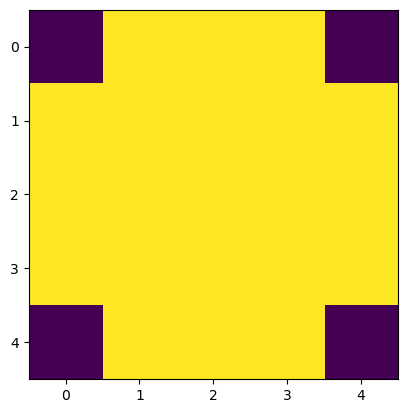

In [8]:
from regions.core import PixCoord
from regions.shapes.circle import CirclePixelRegion
center = PixCoord(4., 5.)
reg = CirclePixelRegion(center, 2.3411)
mask = reg.to_mask()
mask.data
plt.imshow(mask.data)


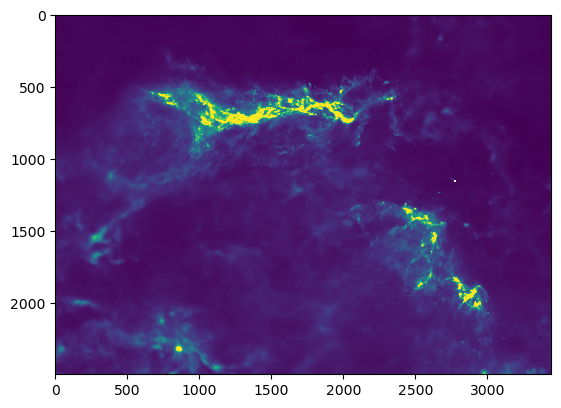

In [36]:
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from matplotlib import pyplot as plt

from regions import Regions


orionA_data = fits.getdata(orionA_file, ext=0, memmap=False)

fig, ax = plt.subplots()
plt.imshow(orionA, vmin = 0.00000533 , vmax = 0.0005)
#ax.set_ylim([-0.5, 892.5])

regions_file_data = get_pkg_data_filename(regions_file)
regions = Regions.read(regions_file_data, format='ds9')
#for i, region in enumerate(regions):
 #   region.plot(ax=ax)

